# <b>Atividades EAD – Teoria e Prática – Semana 6</b>

<i>Aluno: Israel Nunes da Silva - TIA: 3198368-5</i>

# Limiarização de uma imagem usando Python e scikit-image e plotagem do histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib


O site da documentação do scikit-image possui exemplos da limiarização de imagens <a href="https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html">como o realizado por meio do método de Otsu</a> que utiliza o filtro da biblioteca skimage.filters chamado de "<a href="https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu">threshold_otsu</a>".

Segundo <a href="http://www2.ic.uff.br/~aconci/OtsuTexto.pdf">Leonardo Torok</a> "o método de Otsu é um dos mais populares algoritmos de limiarização, utilizado para buscar um threshold ideal para separação dos elementos na frente e no fundo de uma imagem."

Para o histograma foi utilizada a bilbioteca <a href="https://numpy.org/doc/stable/reference/generated/numpy.ravel.html">numpy.ravel</a> para a linearização (achatamento) da informação da imagem com a plotagem por meio da biblioteca <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">pyplot.hist</a>.

As imagens aqui utilizadas foram extraídas do <a href="https://esteio.com.br/curitiba-ontem-hoje/barigui/">site da Empresa Esteio</a>, que são imagens aéreas históricas do Parque Barigui, Curitiba/PR.

Seguindo o exemplo do scikit-image, segue código de limiarização abaixo com troca da imagem e em escala de cinza:

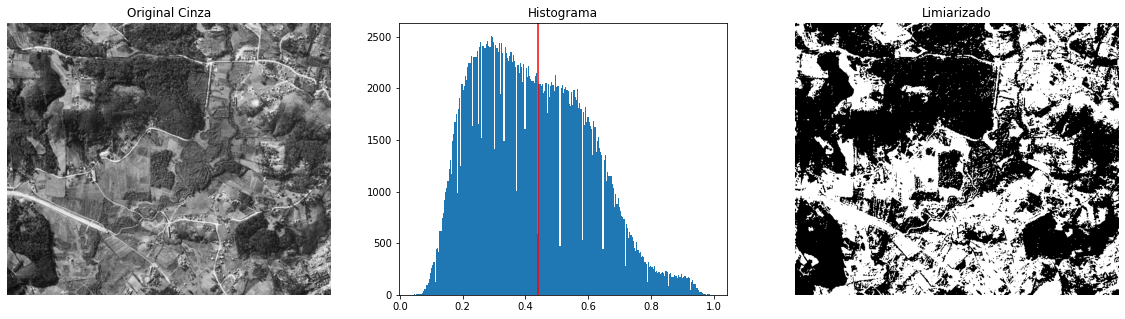

In [24]:
import numpy as np

import matplotlib.pyplot as plt

import skimage.io as skio
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray



img = skio.imread("https://esteio.com.br/curitiba-ontem-hoje/barigui/ano1952_Barigui.jpg")
img_grey = rgb2gray(img)
thresh = threshold_otsu(img_grey)
binary = img_grey > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_grey, cmap=plt.cm.gray)
ax[0].set_title('Original Cinza')
ax[0].axis('off')

ax[1].hist(img_grey.ravel(), bins=256)
ax[1].set_title('Histograma')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Limiarizado')
ax[2].axis('off')

plt.show()

# Plotagem do histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib

Existe um exemplo bem explicado no site <a href="https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935">TowardsDataScience</a> na criação de histogramas no scikit para imagens coloridas, utilizando novamente o pyplot.hist.

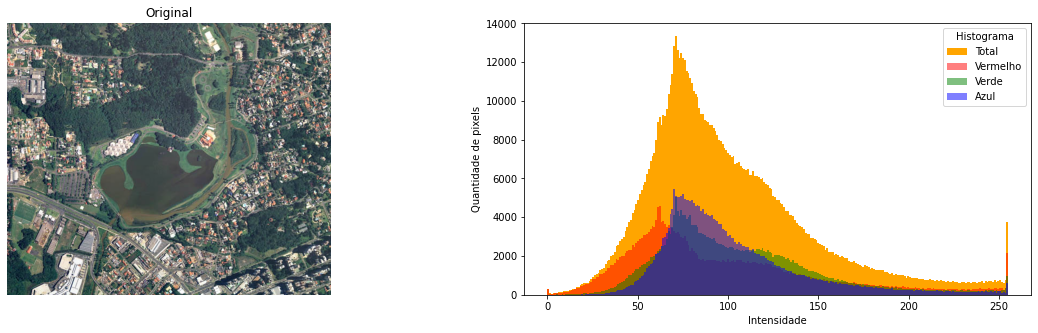

In [41]:
img_color = skio.imread("https://esteio.com.br/curitiba-ontem-hoje/barigui/ano2011_Barigui.jpg")

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(img_color)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img_color.ravel(), bins = 256, color = 'orange', )
ax[1].hist(img_color[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
ax[1].hist(img_color[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
ax[1].hist(img_color[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
ax[1] = plt.xlabel('Intensidade')
ax[1] = plt.ylabel('Quantidade de pixels')
ax[1] = plt.legend(['Total', 'Vermelho', 'Verde', 'Azul'])
ax[1].set_title('Histograma')
plt.show()

#  Equalizando o histograma de uma imagem usando Python e scikit-image

O site da documenação do scikit-image contém exemplos de <a href="https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html">equalização de histograma</a>.

Neste exemplo a principal função utilizada é a <a href="https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist">exposure.equalize_hist</a>, que é a biblioteca que cria a imgem equalizada.

Para visualização, posteriormente, é utilizada a função de distribuição cumulativa <a href="https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.cumulative_distribution">exposure.cumulative_distribution</a>, para, principalmente, checar a solvência da equalização utilizada, em que caso seja executada corretamente, será visto uma linha entre os cantos do gráfico.

C:\Users\rra01\AppData\Local\Temp/ipykernel_8336/2118580391.py:34: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(img)
C:\Users\rra01\AppData\Local\Temp/ipykernel_8336/2118580391.py:41: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 2), dtype=np.object)


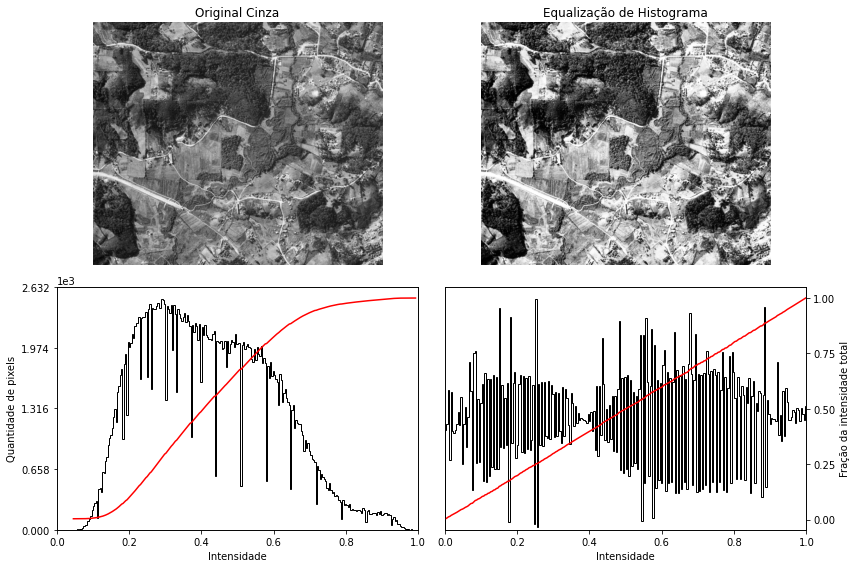

In [40]:
import matplotlib
from skimage import exposure
from skimage import img_as_float
matplotlib.rcParams['font.size'] = 10


def plot_img_and_hist(image, axes, bins=256):

    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Intensidade')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load image
img_org = skio.imread("https://esteio.com.br/curitiba-ontem-hoje/barigui/ano1952_Barigui.jpg")
img = rgb2gray(img)

# Equalization
img_eq = exposure.equalize_hist(img)

# Display results
fig = plt.figure(figsize=(12, 8))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Original Cinza')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Quantidade de pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 1])
ax_img.set_title('Equalização de Histograma')

ax_cdf.set_ylabel('Fração da intensidade total')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Detectando (concluindo) que uma foto está subexposta ou que está superexposta, analisando o histograma

No caso da imagem acima, verifica-se que ela está subexposta, em que considerando a metade da intensidade no histograma da imagem original, a maioria dos pixels ali está para o lado esquerdo, ou seja, com intensidade baixa.

# Detectando (concluindo) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma

No caso da imagem acima, verifica-se que ela está com alto contraste, visto que existe uma boa dispersão no histograma, principalmente entre 0.1 e 0.8, ou seja, os pixels NÃO estão concentrados em algum um trecho do histograma.

As informações sobre como analisar a exposição e o contraste do histograma podem ser obtidas no site <a href="https://www.cambridgeincolour.com/pt-br/tutoriais/histograms1.htm">Cambridge in Color</a>.